<a href="https://colab.research.google.com/github/awalGaurab/Parkinsons-modeling/blob/main/parkinson_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
data = pd.read_csv('parkinsons.data')

In [ ]:
data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
data = data.drop(['name'],axis = 1)

In [ ]:
data.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
data['status'].unique()

array([1, 0])

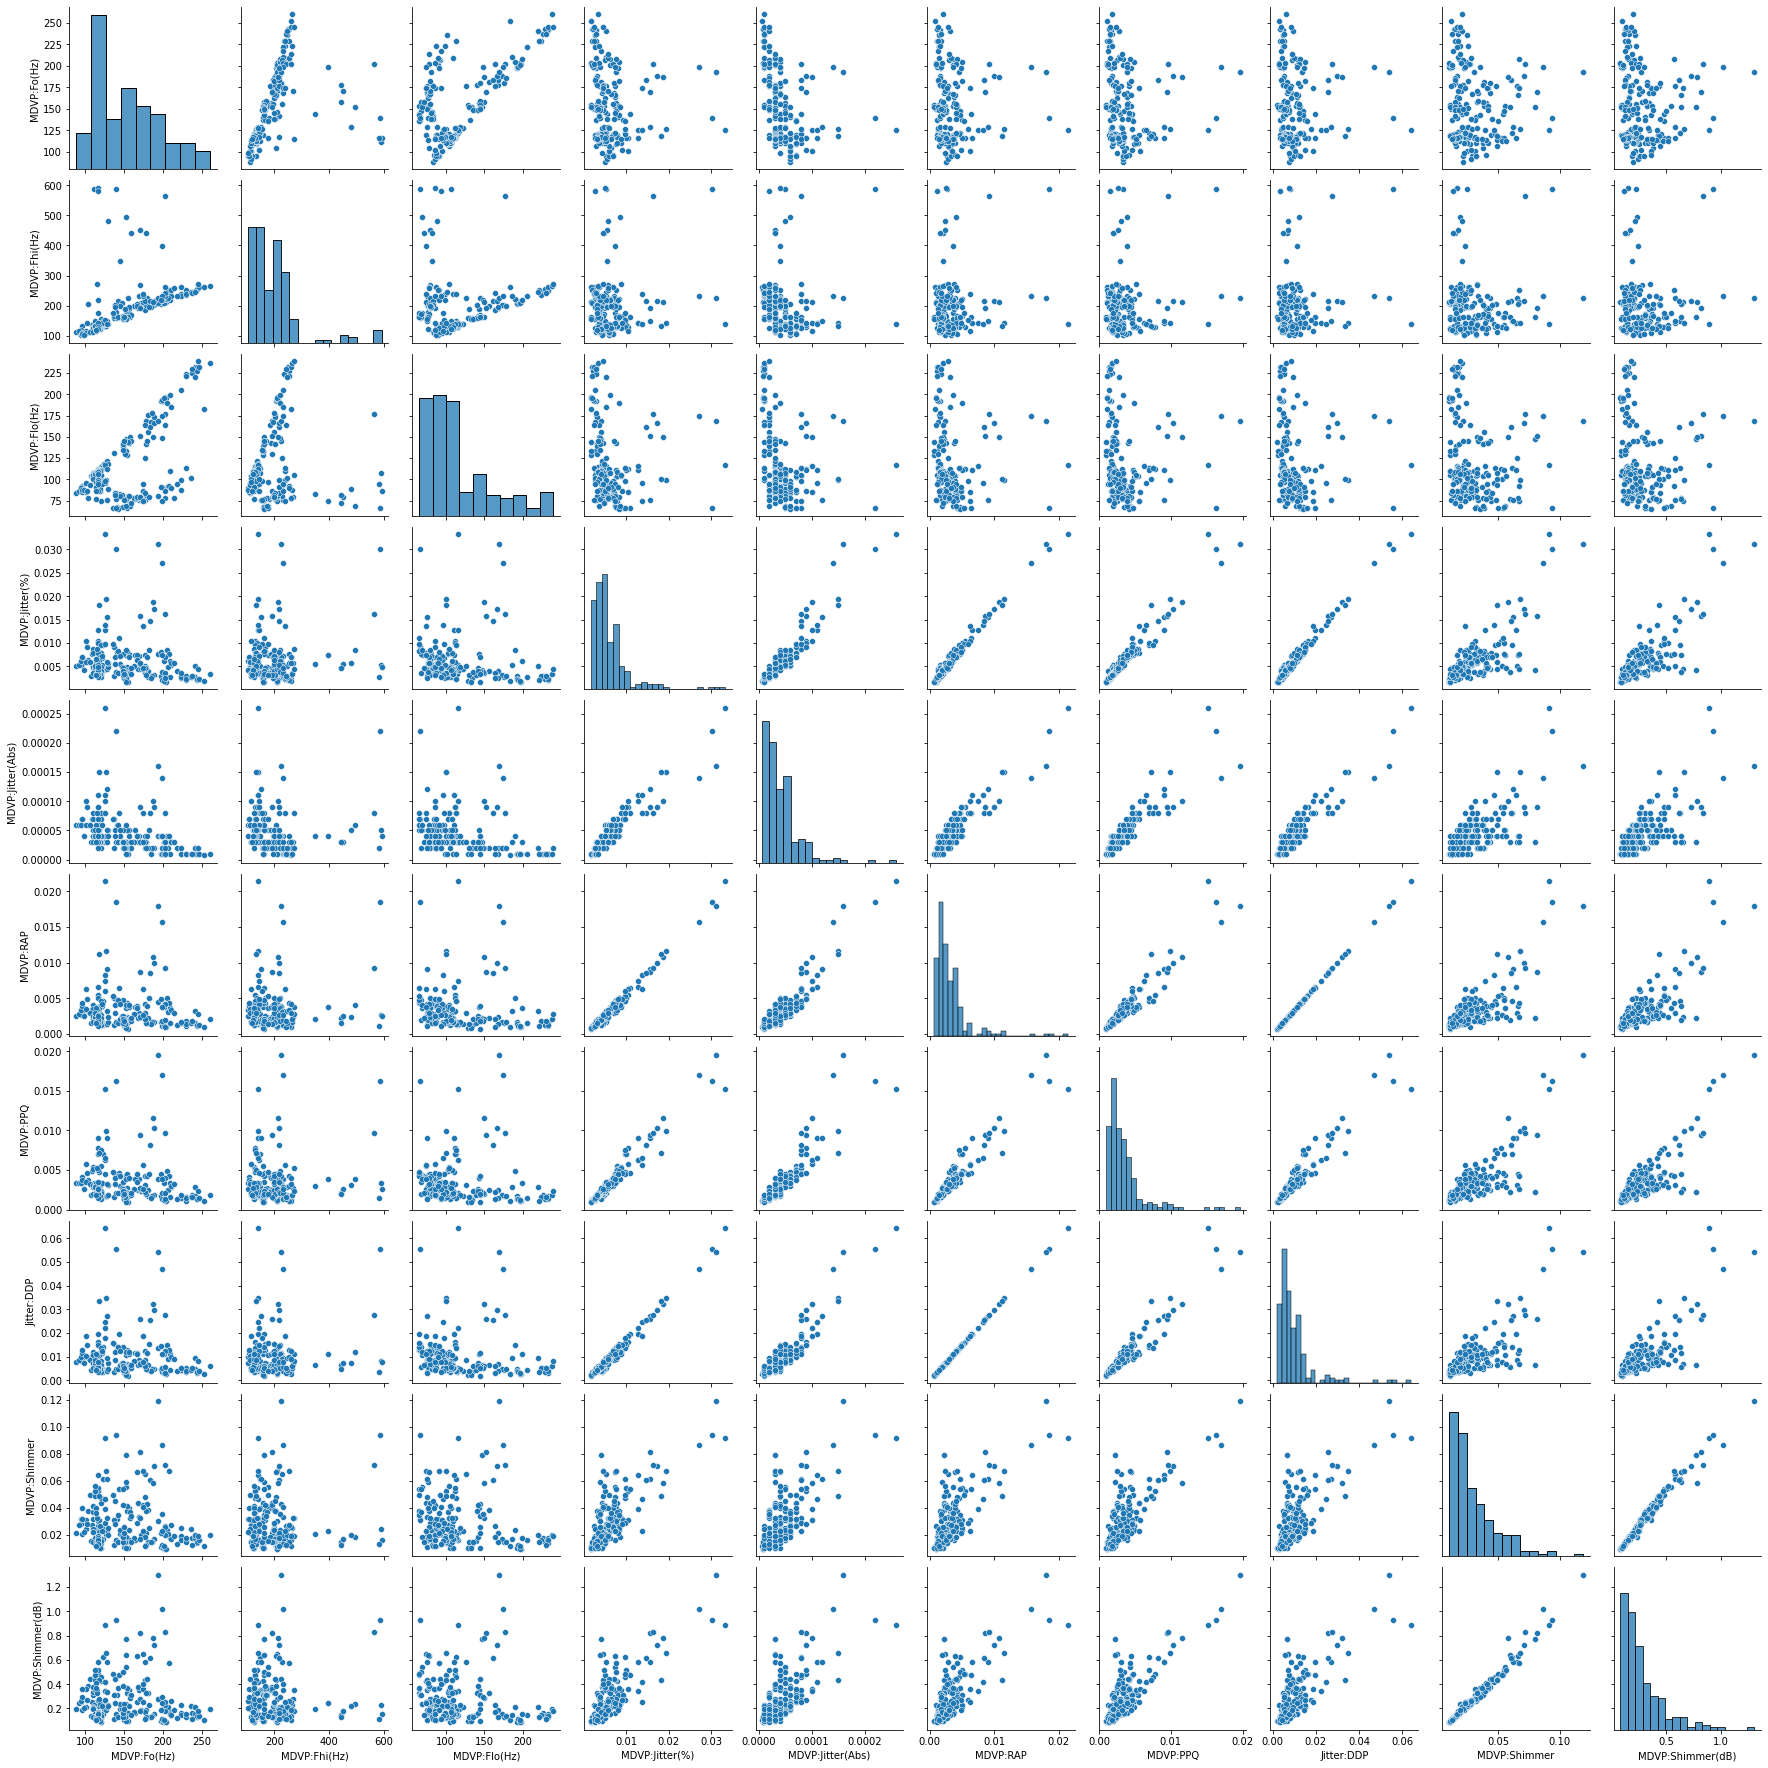

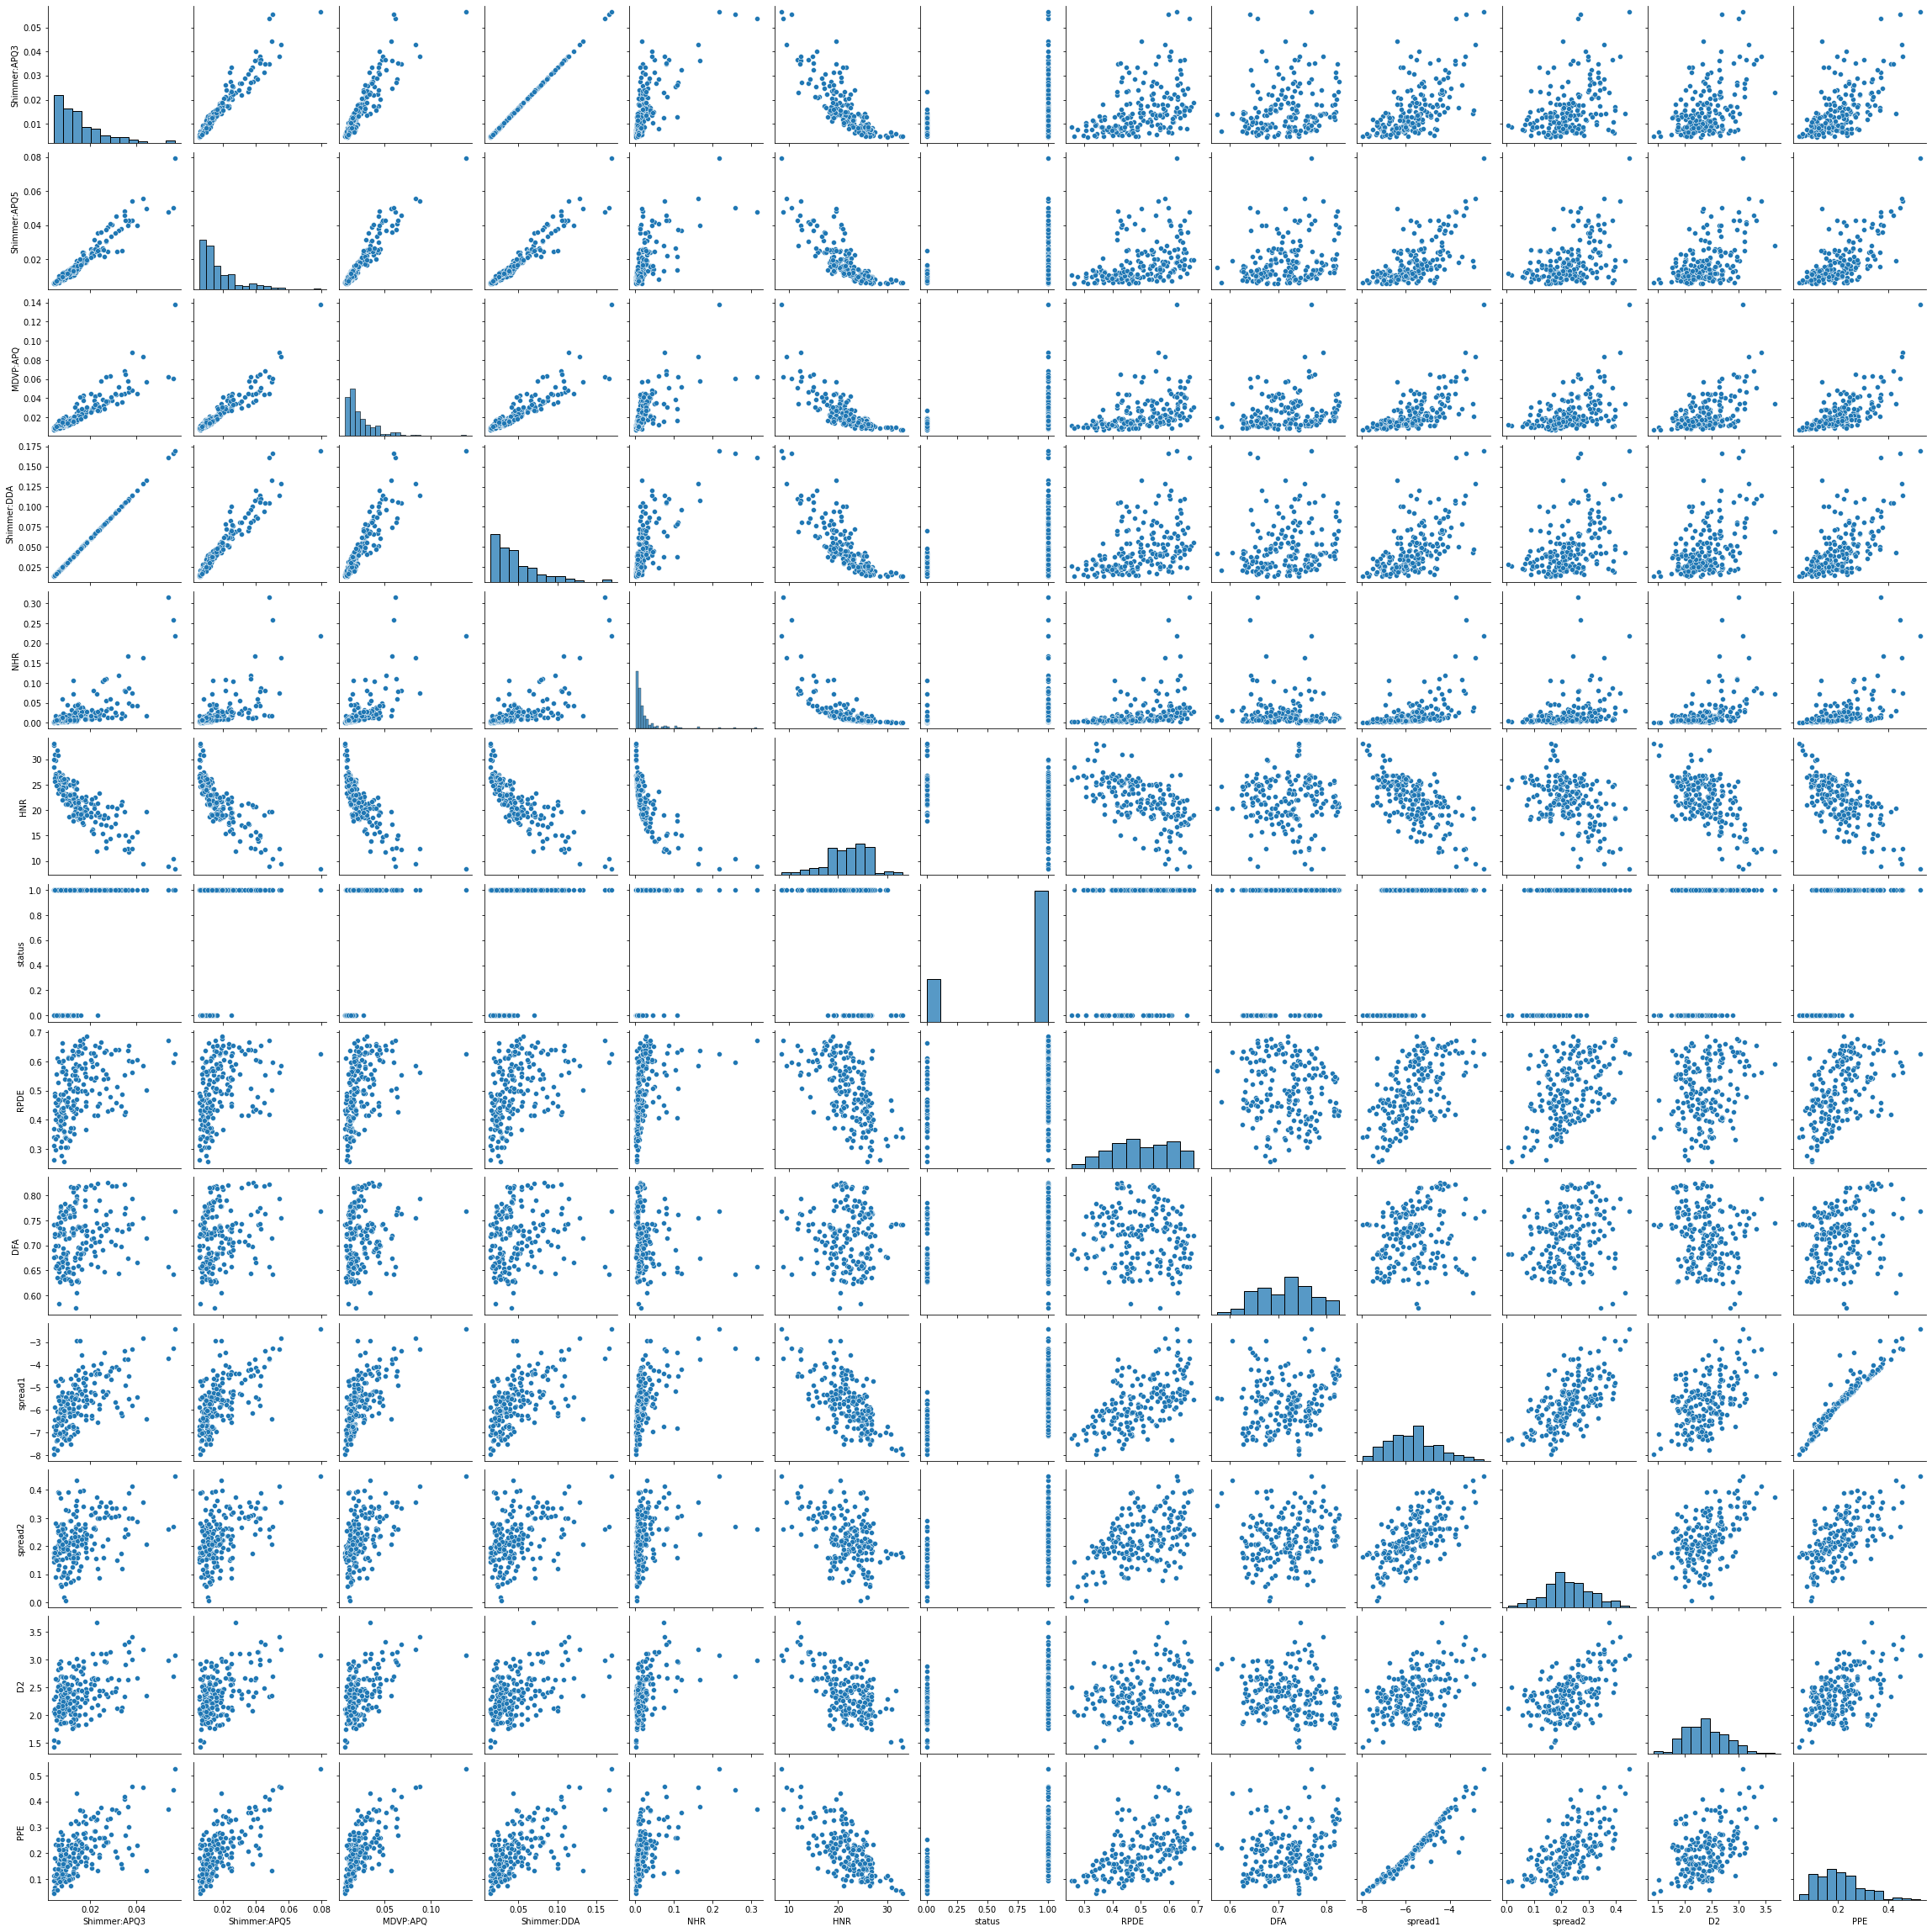

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(data=data.iloc[:,0:10])  # Most of the data are right skewed and have some outliers.
sns.pairplot(data=data.iloc[:,10:])
plt.show()

In [ ]:
targ = data['status']
data = data.drop(['status'],axis = 1)

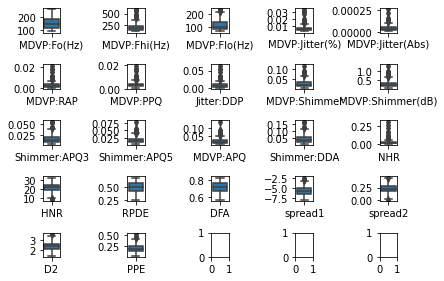

In [ ]:
label_name = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)','MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5','MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE']

fig, axes = plt.subplots(5, 5)

ax = sns.boxplot(ax=axes[0,0], data = data.loc[:,label_name[0]])
ax.set_xticklabels([label_name[0]])

ax = sns.boxplot(ax=axes[0,1], data = data.loc[:,label_name[1]])
ax.set_xticklabels([label_name[1]])

ax = sns.boxplot(ax=axes[0,2], data = data.loc[:,label_name[2]])
ax.set_xticklabels([label_name[2]])

ax = sns.boxplot(ax=axes[0,3], data = data.loc[:,label_name[3]])
ax.set_xticklabels([label_name[3]])

ax = sns.boxplot(ax=axes[0,4], data = data.loc[:,label_name[4]])
ax.set_xticklabels([label_name[4]])

ax = sns.boxplot(ax=axes[1,0], data = data.loc[:,label_name[5]])
ax.set_xticklabels([label_name[5]])

ax = sns.boxplot(ax=axes[1,1], data = data.loc[:,label_name[6]])
ax.set_xticklabels([label_name[6]])

ax = sns.boxplot(ax=axes[1,2], data = data.loc[:,label_name[7]])
ax.set_xticklabels([label_name[7]])

ax = sns.boxplot(ax=axes[1,3], data = data.loc[:,label_name[8]])
ax.set_xticklabels([label_name[8]])

ax = sns.boxplot(ax=axes[1,4], data = data.loc[:,label_name[9]])
ax.set_xticklabels([label_name[9]])

ax = sns.boxplot(ax=axes[2,0], data = data.loc[:,label_name[10]])
ax.set_xticklabels([label_name[10]])

ax = sns.boxplot(ax=axes[2,1], data = data.loc[:,label_name[11]])
ax.set_xticklabels([label_name[11]])

ax = sns.boxplot(ax=axes[2,2], data = data.loc[:,label_name[12]])
ax.set_xticklabels([label_name[12]])

ax = sns.boxplot(ax=axes[2,3], data = data.loc[:,label_name[13]])
ax.set_xticklabels([label_name[13]])

ax = sns.boxplot(ax=axes[2,4], data = data.loc[:,label_name[14]])
ax.set_xticklabels([label_name[14]])

ax = sns.boxplot(ax=axes[3,0], data = data.loc[:,label_name[15]])
ax.set_xticklabels([label_name[15]])

ax = sns.boxplot(ax=axes[3,1], data = data.loc[:,label_name[16]])
ax.set_xticklabels([label_name[16]])

ax = sns.boxplot(ax=axes[3,2], data = data.loc[:,label_name[17]])
ax.set_xticklabels([label_name[17]])

ax = sns.boxplot(ax=axes[3,3], data = data.loc[:,label_name[18]])
ax.set_xticklabels([label_name[18]])

ax = sns.boxplot(ax=axes[3,4], data = data.loc[:,label_name[19]])
ax.set_xticklabels([label_name[19]])

ax = sns.boxplot(ax=axes[4,0], data = data.loc[:,label_name[20]])
ax.set_xticklabels([label_name[20]])

ax = sns.boxplot(ax=axes[4,1], data = data.loc[:,label_name[21]])
ax.set_xticklabels([label_name[21]])

fig.tight_layout()      
plt.show()

In [ ]:
label_name = ['MDVP:Fo(Hz)','MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)','MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5','MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE']

for coln in label_name:
    q1 = data[coln].quantile(0.25)
    q3 = data[coln].quantile(0.75)
    iqr = q3 - q1

    low_limit = q1 - (1.5 * iqr)
    high_limit = q3 + (1.5 * iqr)
    feat = data[(data[coln] > low_limit) | (data[coln] < high_limit)]
    new_df = pd.DataFrame(data)



In [ ]:
new_df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(new_df),index=new_df.index,columns=new_df.columns)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'penalty': ['l1','l2','elasticnet'],
    'C': [0.001,0.01,0.1,1,10,100,1000],
    'solver': [ 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100,200,500,1000,2500,5000,10000,25000],
}
]
lg_reg = LogisticRegression()
clf = GridSearchCV(estimator = lg_reg,param_grid = param_grid,cv=10,verbose=True,n_jobs = -1)
clf.fit(df_scaled,targ)
print("****************************** Best parameter is ",clf.best_params_)

Fitting 10 folds for each of 672 candidates, totalling 6720 fits
****************************** Best parameter is  {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3360 fits failed out of a total of 6720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
560 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: S

In [21]:
lg_reg = LogisticRegression(C = 0.1, max_iter = 100, penalty = 'l2', solver = 'lbfgs')
# 'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'

X_train,X_test,y_train,y_test = train_test_split(df_scaled,targ,test_size=0.2,random_state=1)

lg_reg.fit(X_train,y_train)
predict = lg_reg.predict(X_test)

report = accuracy_score(y_test,predict)
clf_report = classification_report(y_test,predict)
cm = confusion_matrix(y_test,predict)

print("score on test: " + str(lg_reg.score(X_test, y_test)))
print("score on train: "+ str(lg_reg.score(X_train, y_train)))

print("Accuracy of our model is %0.2f" %(report)) #92%
print("-----------------------------------------------------")
print(clf_report)

print("-----------------------------------------------------")
print("Confusion matrix : ")
print(cm)


score on test: 0.8974358974358975
score on train: 0.8525641025641025
Accuracy of our model is 0.90
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.90      0.97      0.93        29

    accuracy                           0.90        39
   macro avg       0.89      0.83      0.86        39
weighted avg       0.90      0.90      0.89        39

-----------------------------------------------------
Confusion matrix : 
[[ 7  3]
 [ 1 28]]
